In [1]:
import torch
import pandas as pd
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

PubMed Real node features

In [2]:
real_feature_path = '../features/pubmed/real_node_features20.pt'
real_class_path = '../features/pubmed/real_node_class20.pt'
syn_feature_path = '../features/pubmed/sync251517203446/sync251517203446_node_features20.pt'
syn_class_path = '../features/pubmed/sync251517203446/sync251517203446_node_class20.pt'

In [3]:
def cosine_sim(original,sampled):
    return cosine_similarity(np.array(original), np.array(sampled))

In [4]:
node_feature_real = torch.load(real_feature_path).detach().numpy()
node_feature_real.shape

(20, 200)

In [5]:
df_real = pd.DataFrame(node_feature_real)
node_class_real = torch.load(real_class_path).detach().numpy()
node_class_real

array([2, 1, 3, 1, 2, 1, 2, 0, 2, 0, 1, 2, 1, 2, 0, 1, 1, 2, 2, 2])

In [6]:
df_real['class'] = node_class_real

In [7]:
node_feature_syn = torch.load(syn_feature_path).detach().numpy()
node_feature_syn.shape

(20, 200)

In [8]:
node_class_syn = torch.load(syn_class_path).detach().numpy()
node_class_syn

array([1, 3, 0, 1, 0, 2, 3, 1, 1, 3, 3, 2, 0, 3, 2, 1, 3, 0, 1, 2])

In [9]:
df_syn = pd.DataFrame(node_feature_syn)
df_syn['class'] = node_class_syn

In [10]:
class1_real = df_real[df_real['class'] == 1].drop(['class'], axis = 1)
class1_real

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
1,0.046243,-0.053096,0.172913,-0.054958,-0.067897,-0.085993,-0.018125,-0.015739,-0.088420,-0.059357,...,0.049776,-0.143222,-0.048196,0.064141,0.109292,-0.019739,-0.005791,0.030518,0.082756,-0.000861
3,-0.659812,-0.190948,-0.070060,-1.132908,0.336080,-0.457493,-0.098807,-0.626486,-0.221115,0.277460,...,0.216474,-0.126743,-0.074034,0.740185,0.054646,0.661128,-0.390840,-0.215677,-0.129845,0.305813
5,0.083797,0.254973,0.627800,-0.298222,-0.177998,0.176833,-0.146067,-0.013224,-0.359620,-0.121256,...,0.163170,0.120463,0.047832,-0.078685,0.449323,0.135364,-0.096546,0.192946,-0.291086,-0.017323
10,-0.032754,-0.125387,0.169142,-0.036555,-0.008356,-0.056708,0.046928,-0.040014,-0.095425,0.051622,...,0.006722,0.017952,-0.026455,0.085274,0.112252,-0.007652,-0.146117,-0.057026,-0.098367,-0.038938
12,-0.168663,-0.169069,0.054270,-0.109294,0.474658,-0.113610,0.012386,0.017206,0.131085,0.133807,...,0.252736,0.054244,-0.240772,0.052491,0.146222,-0.083752,-0.138147,-0.069993,-0.130343,0.016309
15,0.029679,-0.148600,-0.077610,-0.064223,0.060631,-0.218737,0.177132,-0.027073,-0.201276,0.020205,...,-0.108893,-0.089251,0.016506,0.065231,0.134533,0.052762,-0.153307,-0.131521,-0.137502,0.121544
16,0.022663,-0.088328,0.103506,-0.016147,-0.013450,-0.039314,-0.059985,0.111678,0.018969,-0.040882,...,-0.047835,-0.040062,-0.112302,-0.155472,-0.026925,-0.044125,-0.050066,0.000353,-0.049740,0.044683


In [11]:
class1_syn = df_syn[df_syn['class'] == 1].drop(['class'], axis = 1)
class1_syn

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.008083,0.009032,-0.031628,0.143802,-0.081099,-0.059653,-0.110129,0.072871,-0.032654,-0.206551,...,0.039787,-0.078998,-0.064433,0.231356,0.047570,-0.033496,0.063386,0.092092,0.114189,0.000366
3,0.147872,-0.132830,-0.061033,-0.125246,-0.016309,-0.016247,-0.108091,0.167080,0.073360,-0.192927,...,-0.050090,0.194846,0.217338,0.146015,0.094753,0.010164,0.098304,-0.013490,0.037936,-0.001960
7,-0.079322,-0.093003,0.030668,-0.072324,0.108987,0.122015,0.064487,-0.012906,0.022075,0.092282,...,-0.037319,-0.020113,-0.050200,0.127057,0.007995,0.172513,-0.095691,-0.161165,-0.021401,0.000081
8,0.083805,-0.015179,-0.033328,0.122547,0.125312,-0.070356,-0.044518,0.214226,0.130440,0.128883,...,-0.127551,0.031183,0.025136,0.132549,-0.016090,0.040728,-0.121425,-0.032062,0.095593,0.141728
15,-0.112938,-0.043656,-0.081141,-0.068678,-0.006387,-0.025748,0.124486,-0.094622,-0.101585,-0.096849,...,0.013718,-0.074192,-0.009818,-0.280141,0.011451,-0.059940,-0.022940,0.189255,0.091647,0.083650
18,0.037391,0.053823,-0.129079,-0.246366,-0.177213,-0.137256,0.063344,0.104845,-0.113752,0.058841,...,-0.115405,0.045486,0.075321,-0.006889,0.091623,-0.017606,-0.015511,-0.054418,-0.027821,-0.102435


In [12]:
sns.set(font_scale=1.4)

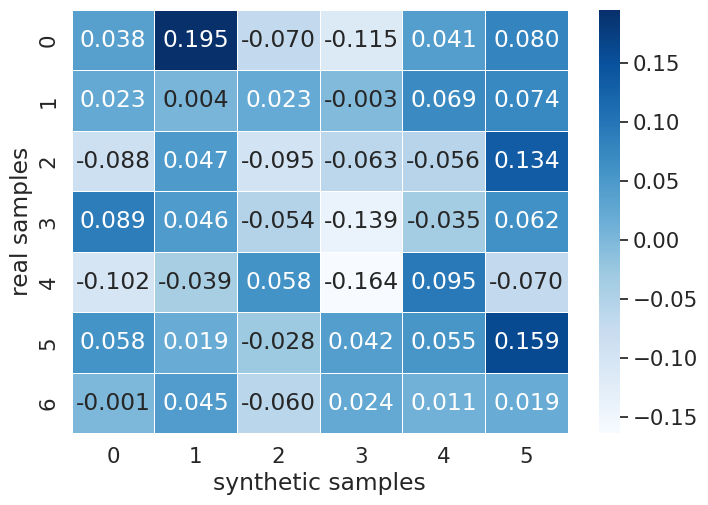

In [13]:
fig, ax = plt.subplots(figsize=(8,5.5))
sns.heatmap(cosine_sim(class1_real,class1_syn), 
            xticklabels = 1, yticklabels = 1,annot =True, cmap='Blues',fmt='.3f', linewidth=.5)
plt.xlabel("synthetic samples") 
plt.ylabel("real samples") 
plt.show()

In [14]:
def plot_graph(G,classes):

    color_class_map = {0: 'blue', 1: 'red', 2: 'darkgreen', 3: 'orange'}

    nx.set_node_attributes(G, dict(zip(G.nodes(), classes)), 'class')

    nx.draw(G, 
        with_labels=True, node_color=[color_class_map[node[1]['class']] 
                        for node in G.nodes(data=True)], 
            #node_size=800,
        font_color='white')
    plt.show()

In [15]:
plt.rcParams.update({'axes.ymargin': 0.2})

In [16]:
def compare_plot_node_type_dist(df):
    df_new = df.apply(pd.value_counts).T
    color=['blue','red','darkgreen','orange']
    ax=df_new.plot.bar(width=0.2,figsize=(7,7),color=color)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
#     for i in ax.containers:
#         ax.bar_label(i,fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    
    plt.legend(fontsize="20", loc ="lower center")
    plt.ylabel('no. of nodes',fontsize=20)
    plt.tight_layout()
    plt.show();

In [17]:
G_real = nx.read_gexf('../real_graphs/pubmed/real_G20.gexf')

In [18]:
#G_real.nodes(data=True)

In [19]:
print('classes of Disease nodes', list(nx.get_node_attributes(G_real, "class").values()))

classes of Disease nodes [6]


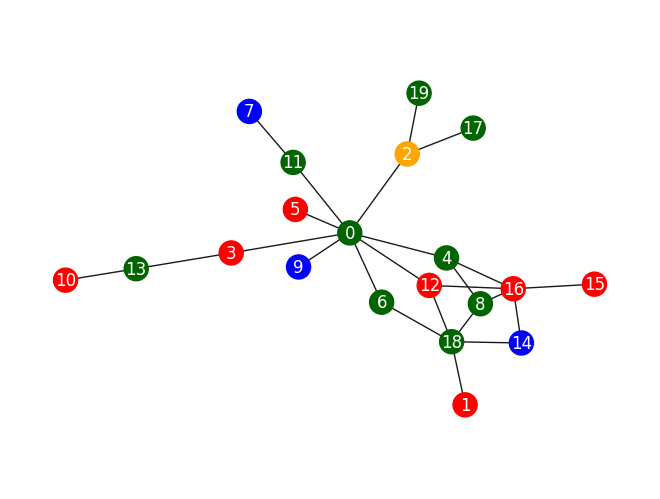

In [21]:
plot_graph(G_real,node_class_real)

In [22]:
G_syn = nx.read_gexf('../features/pubmed/sync251517203446/sync251517203446_G20.gexf')

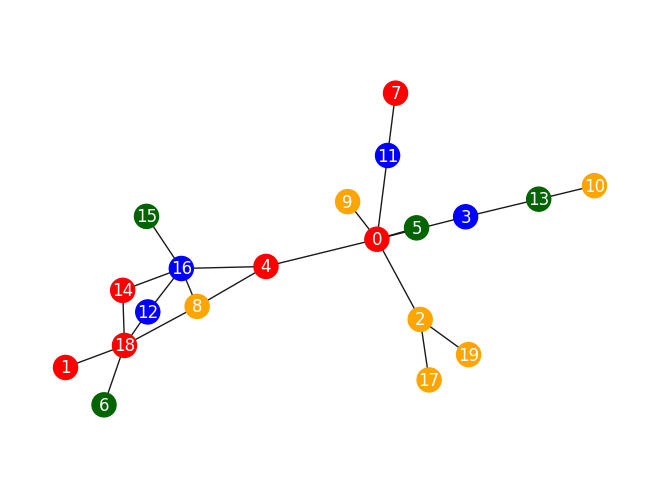

In [23]:
plot_graph(G_syn,node_class_syn)

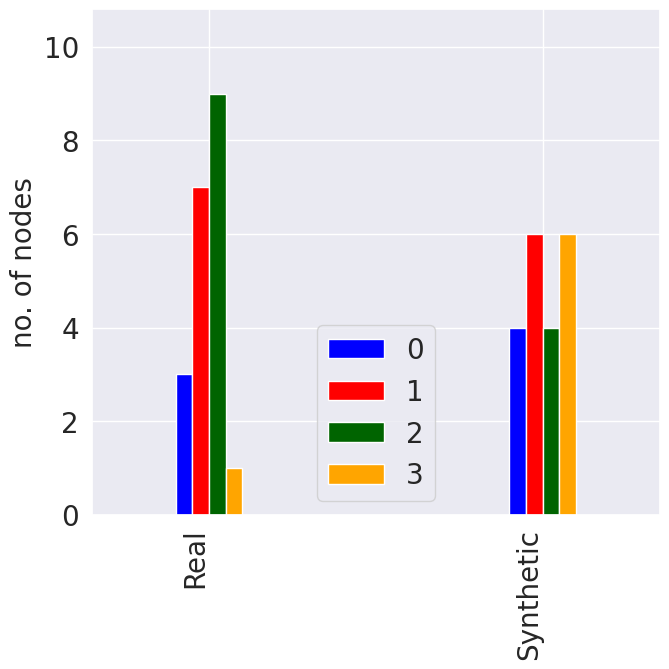

In [24]:
df_compare = pd.DataFrame()
df_compare['Real'] = list(node_class_real)
df_compare['Synthetic'] = list(node_class_syn)
compare_plot_node_type_dist(df_compare)